# Guía 4 Problema 11: Método Montecarlo. Aceptación-Rechazo
---------------------------------------------------------------------
*Por Gabriel Goren. L.U.:199/15. FCEN - UBA*

**(a) Escriba la densidad de probabilidad conjunta de $r$, $\theta$ y $\phi$ (las coordenadas esféricas usuales).**

La PDF conjunta $f(r,\theta,\phi)$ debe satisfacer

$$ f(r,\theta,\phi) \, dr \, d\theta \, d\phi \propto \frac{\rho_0}{1 + r^2} \, r^2 \sin(\theta) \, dr \, d\theta \, d\phi.$$

Esto es así pues la probabilidad de que un elemento de fluido tenga su coordenada radial $R$ entre $r$ y $r + dr$, su colatitud $\Theta$ entre $\theta$ y $\theta + d\theta$ y su coordenada azimutal $\Phi$ entre $\phi$ y $\phi + d\phi$ es igual a $ f(r,\theta,\phi) \, dr \, d\theta \, d\phi$, y por otro lado se nos dice que esta debe ser proporcional a la masa contenida en un diferencial de volumen $d^3r = r^2 \sin(\theta) \, dr \, d\theta \, d\phi$.

De aquí se obtiene via normalización que

\begin{align*}
f(r,\theta,\phi) &= \alpha \sin(\theta) \frac{r^2}{1 + r^2} \\
\alpha &= \frac{1}{4 \pi (1 - \pi/4)}
\end{align*}

** (b) Calcule las distribuciones de probabilidad marginales de cada una de las coordenadas por separado.
¿Son estas independientes? **

Integrando, se obtienen las marginales

\begin{align}
f(r)      &= 4 \pi \, \alpha \; \frac{r^2}{1+r^2} \\
f(\theta) &= \frac{\sin(\theta)}{2} \\
f(\phi)   &= \frac{1}{2 \pi}
\end{align}

Ahora testeamos independencia:

\begin{align}
f(r) \, f(\theta) \; f(\phi) &= 4 \pi \, \alpha \; \frac{r^2}{1+r^2} \frac{\sin(\theta)}{2} \frac{1}{2 \pi} \\
&= \alpha \; \frac{r^2}{1+r^2} \; \sin(\theta) \; = \; f(r,\theta,\phi)
\end{align}

Concluimos que las variables aleatorias $R$, $\Theta$ y $\Phi$ son independientes.

** (c) Genere 10000 valores al azar de cada variable, usando el método de Monte Carlo. Grafique los histogra-
mas de las distintas variables, y superponga las distribuciones correspondientes. **

>**Método de Monte Carlo: Aceptación-Rechazo**
>
>Para generar números pseudoaleatorios con una distribución arbitraria f (t),
en un dominio [a, b] en el que f está acotada (siendo fm su valor máximo)
se puede proceder de la siguiente manera:
>
>I.   Se generan dos números al azar 'y' y 'z' con dist. uniforme en [0, 1].
>
>II.  A partir de y y z se determinan u = a + (b − a)y y v = fm * z.
>
>III. Si v ≤ f (u), se incluye x = u en la muestra de números generados, en
otro caso se descarta.
>
>IV.  Se repiten los pasos I-III hasta obtener la cantidad deseada de números
aceptados.

Notar cómo u y v también tienen distribución continua, pero reescalada.

A continuación se muestra el código empleado junto con su output.

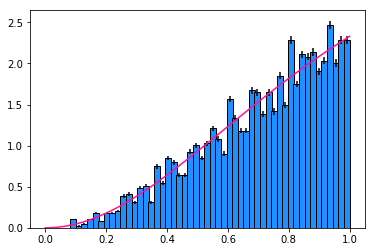

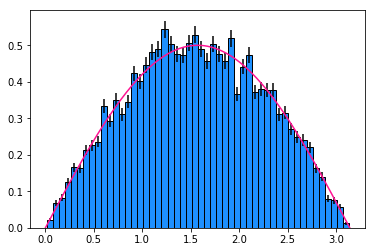

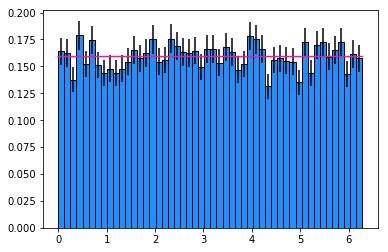

In [2]:
### En este ejercicio generamos las CI de una simulación de una esfera de 
### fluido de radio 1, con 10000 elementos de fluido.

# Lo hacemos generando 10000 valores de cada una de las variables espaciales
# esféricas por separado, r, tita, phi, según sus distribuciones marginales.
# Luego el vector aleatorio (r, tita, phi) estará distribuido según la
# distribución conjunta. Esto solo es posible dado que las tres variables son
# independientes.

hist = [] # CORRECCION: Defino una lista para guardar los datos del histograma

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
%matplotlib inline

# Marginales de r, tita y phi
alfa = 1/(np.pi * (4 - np.pi))
def f_r(r):
    return 4*np.pi * alfa * r**2/(1 + r**2)
def f_tita(tita):
    return np.sin(tita)/2
def f_phi(phi):
    return 1/(2 * np.pi)
f = {0:f_r, 1:f_tita, 2:f_phi}
 
# Listas que especifican los dominios (a,b) de cada var. al. y el valor máximo
# que pueden alcanzar. 
a =    (0,              0,     0)
b =    (1,              np.pi, 2*np.pi)
fmax = (4*np.pi * alfa, 1/2,   1/(2*np.pi))
 
#Para referir a las variables aleatorias mediante un índice numérico:
nombres = {0:'r', 1:'tita', 2:'phi'}
#Aquí se guardan los resultados:
esfericas = {} 
 
for k in range(3):
    #Variables aleatorias uniformes entre 0 y 1
    y = np.array([uniform() for i in range(10000)])
    z = np.array([uniform() for i in range(10000)])
    #Variables reescaladas:
    u = a[k] + (b[k]-a[k]) * y
    v = z * fmax[k]
    #Aceptación-rechazo:
    esfericas[nombres[k]] = [l for (l,m) in zip(u,v) if m <= f[k](l)]
    
    #Ahora hacemos el gráfico
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    numbines = 50
    ancho = (b[k]-a[k]) / 50 # Ancho de los bines según dominio de las var. al.
    y, bordes_bines = np.histogram(esfericas[nombres[k]], bins=numbines, normed=True)
    # A partir de los bordes de los bines, generamos una lista de los centros de
    # los bines, requerida por la función pyplot.bar:
    centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
    # Normalizamos el error poissoniano para mantener el error relativo:
    error = np.sqrt(y)/np.sqrt(1000)
    # Ahora graficamos el histograma con pyplot:
    ax.bar(centros_bines, y, width=ancho, color='dodgerblue', yerr=error, edgecolor='black')
    
    hist.append((f[k], centros_bines, y, error)) # CORRECCION: Guardo los datos del histograma

    # Vector de abcisas para graficar las marginales:
    x = np.linspace(a[k], b[k], num=10000)
    # Graficamos las marginales:
    ax.plot(x, np.array(list(map(f[k], x))), color='deeppink' )
    # Acá requiero usar map porque el broadcasting automático que realiza
    # numpy cuando aplico f_r, f_tita a un array como lo es x falla al emplear
    # la función f_phi, debido a que esta última es constante.

Se observa que los histogramas normalizados siguen aproximadamente a las distribuciones marginales correspondientes.

--------------------------

Como comentario al margen, antes de resolver el ejercicio usando el código de más arriba, en una primera instancia había definido las marginales usando Sympy, como expresiones simbólicas. En el paso de aceptación-rechazo, en vez de comparar `m <= f[k](l)`, comparaba `m <= f[k].subs(x,l)` siendo `x` el símbolo de Sympy empleado como variable de las marginales. Como consecuencia, la generación de los 3 arrays de 10000 números aleatorios tardó minutos, cosa que se redujo a menos de un segundo al pasar todo el código a Numpy. Moraleja: ¡No usar matemática simbólica en simulaciones! En especial si no presenta ninguna ventaja como fue en este caso.

# Corrección

Al igual que en el ejercicio anterior, están mal los errores de los histogramas porque no consideraste los anchos de los bins del histograma para normalizar (los errores, la de la altura de cada bin está bien porque lo hace numpy.histogram, aunque es mejor usar el keyword density=True en lugar de normed=True por si usas bin de distintos anchos).

Por ejemplo, podemos chequear el $\chi^2$:

(Técnicamente no es $\chi^2$ ya que deberían ser errores normales, pero aproximadamente tiene que dar.)

In [6]:
for f, x, y, yerr in hist:
    Z = (y-f(x)) / yerr # A esto tambien le llaman Z-score
    Z = Z[np.isfinite(Z)] # Saco los que dan infinito por ser yerr=0
    chi2 = np.sum(Z**2)
    print('El chi2 es', chi2, 'y esperabamos', Z.size, '±', np.sqrt(2*Z.size))

El chi2 es 1223.94708936 y esperabamos 50 ± 10.0
El chi2 es 119.66426016 y esperabamos 50 ± 10.0
El chi2 es 42.4281684741 y esperabamos 50 ± 10.0


Excepto en el último caso, que habría que revisar si hubo alguna coincidencia con el ancho de bin, dan muy lejos de lo esperado. En el gráfico de $r$ se ve a ojo que los errores están subestimados.

# Fin corrección

Con respecto a lo de SymPy, te puede generar una función que corra más rápido (de numpy, por ejemplo) a partir de la computación simbólica. Podés leer acá: http://docs.sympy.org/latest/modules/numeric-computation.html